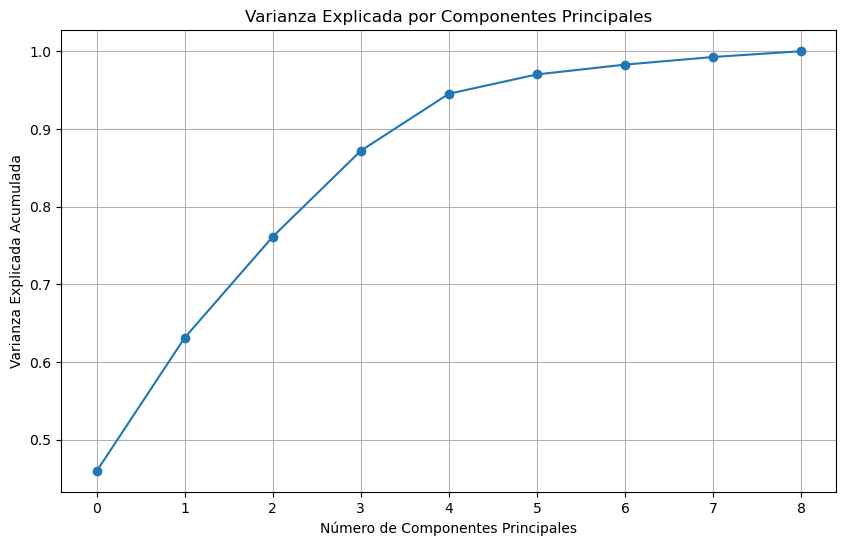

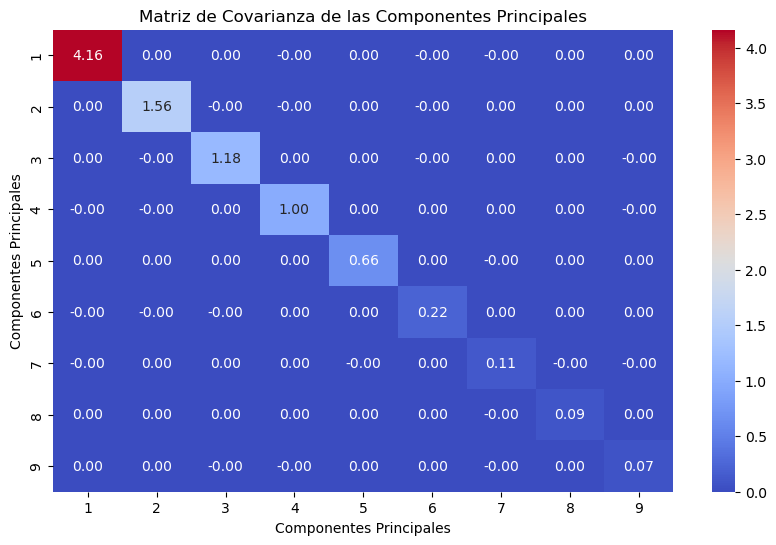

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paso 1: Inspección y limpieza del DataFrame
# Cargar los datos
data = pd.read_csv("country-data.csv") 

# Eliminar valores NaN si los hay
data.dropna(inplace=True)

# Paso 2: Aplicar PCA
# Separar la columna del país
pais = data['country']
data = data.drop('country', axis=1)

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Paso 3: Determinar el número de componentes principales
# Graficar la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Paso 4: Graficar la matriz de covarianza de las componentes principales
# Obtener las componentes principales transformadas
components = pca.transform(data_scaled)

# Calcular la matriz de covarianza
cov_matrix = np.cov(components.T)

# Graficar la matriz de covarianza
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=range(1, cov_matrix.shape[0] + 1),
            yticklabels=range(1, cov_matrix.shape[0] + 1))
plt.title('Matriz de Covarianza de las Componentes Principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Componentes Principales')
plt.show()
